MACHINE LEARNING MODEL FOR STOCKS RETURN PREDICTIONS BY FINANCIAL FUNDAMENTALS

Part 2: DATA PREPROCESSING AND MODEL BUILDING.

---

There is plenty to do with the newly scraped data.

To do List


1.   Decide the value to assign in cases where the past value (cell below) is 0 (Specifaclly in Repurchase of stocks where is too common to do it just in some periods) OPTIONS: (1. Assign just a +100%. 2. Replace maybe with the column MAX or MEAN.  3. Delete the whole column and add a RATIO between market cap)
2.   List item




To try list in case of poor performance


1.   Try using the exact initial date for features calculation which use stock price.
2.   Add original accounts as features
3. Remove examples with initial price = 0 ( Stocks which start to be public less than 4 year ago) 
4. Remove examples with final price = 0 (stocks that presented their last statms 2.5 or less months ago)
5. Research if outliers resulted from followed accounts changes (e,g: 100% or -100%) should be removed.
6. Detect if NAN is either arised from consequent missing values or only one missing.    

New features ideas 

1.   Repurchase of stocks/market cap RATIO
2.   Boolean for dividends or not


Problem's Nature Considerations:


1.   List item
2.   List item






In [1]:
#Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fundamentals_FinalDF.csv to Fundamentals_FinalDF.csv


In [3]:
import io
First_df = pd.read_csv(io.BytesIO(uploaded['Fundamentals_FinalDF.csv']))
First_df

,stock,endDate,netIncome,totalRevenue,ebit,researchDevelopment,operatingIncome,interestExpense,totalAssets,totalLiab,totalCurrentLiabilities,totalCurrentAssets,repurchaseOfStock,Initial Prices,Final Prices,Ordinary Shares Number,Total Debt,Free Cash Flow
0,MSFT,2020-06-30,4.428100e+10,1.430150e+11,5.295900e+10,1.926900e+10,5.295900e+10,-2.591000e+09,3.013110e+11,1.830070e+11,7.231000e+10,1.819150e+11,-2.296800e+10,194.240005,208.779999,7571000.0,70998000.0,45234000.0
1,MSFT,2019-06-30,3.924000e+10,1.258430e+11,4.295900e+10,1.687600e+10,4.295900e+10,-2.686000e+09,2.865560e+11,1.842260e+11,6.942000e+10,1.755520e+11,-1.954300e+10,132.850006,136.330002,7643000.0,78366000.0,38260000.0
2,MSFT,2018-06-30,1.657100e+10,1.103600e+11,3.505800e+10,1.472600e+10,3.505800e+10,-2.733000e+09,2.588480e+11,1.761300e+11,5.848800e+10,1.696620e+11,-1.072100e+10,100.860001,112.139999,7677000.0,81808000.0,32252000.0
3,MSFT,2017-06-30,2.548900e+10,9.657100e+10,2.933100e+10,1.303700e+10,2.933100e+10,-2.222000e+09,2.503120e+11,1.626010e+11,5.574500e+10,1.626960e+11,-1.178800e+10,70.870003,75.309998,7708000.0,86194000.0,31378000.0
4,T,2020-12-31,-5.176000e+09,1.717600e+11,2.565600e+10,NaN,2.565600e+10,-7.925000e+09,5.257610e+11,3.465210e+11,6.343800e+10,5.200800e+10,-5.498000e+09,29.400000,30.010000,7125922.0,179447000.0,27455000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,HERDEZ.MX,2017-12-31,1.046111e+09,2.006492e+10,2.812898e+09,NaN,2.812898e+09,-5.734910e+08,2.784602e+10,1.050422e+10,3.123141e+09,8.254989e+09,-1.551190e+08,45.730000,46.980000,428549.0,6350785.0,1327645.0
250,NTDOY,2020-03-31,2.586410e+11,1.308519e+12,3.523710e+11,8.412700e+10,3.523710e+11,NaN,1.934087e+12,3.931870e+11,3.556830e+11,1.501583e+12,-4.300000e+07,40.709999,55.700001,119124.0,NaN,337910000.0
251,NTDOY,2019-03-31,1.940090e+11,1.200560e+12,2.497020e+11,6.962400e+10,2.497020e+11,NaN,1.690304e+12,2.755060e+11,2.450090e+11,1.344972e+12,-3.103800e+10,35.889999,43.180000,119125.0,NaN,159792000.0
252,NTDOY,2018-03-31,1.395900e+11,1.055682e+12,1.775580e+11,6.399900e+10,1.775580e+11,NaN,1.633748e+12,3.101730e+11,2.780760e+11,1.276764e+12,-7.800000e+07,56.400002,41.650002,120126.0,NaN,142599000.0


In [4]:
First_df.loc[First_df['Initial Prices'] == 0]

,stock,endDate,netIncome,totalRevenue,ebit,researchDevelopment,operatingIncome,interestExpense,totalAssets,totalLiab,totalCurrentLiabilities,totalCurrentAssets,repurchaseOfStock,Initial Prices,Final Prices,Ordinary Shares Number,Total Debt,Free Cash Flow
217,DBX,2017-12-31,-111700000.0,1.106800e+09,-113700000.0,380300000.0,-113700000.0,-14000000.0,1.019900e+09,9.170000e+08,7.384000e+08,5.181000e+08,-87900000.0,0.0,28.48,395000.0,174300.0,304200.0
225,PAGS,2017-12-31,478781000.0,2.514809e+09,779521000.0,NaN,779521000.0,-104544000.0,4.235757e+09,3.365366e+09,3.318967e+09,4.027953e+09,-39532000.0,0.0,33.41,262289.0,0.0,346069.0


In [5]:
First_df.loc[First_df['Final Prices'] == 0]

,stock,endDate,netIncome,totalRevenue,ebit,researchDevelopment,operatingIncome,interestExpense,totalAssets,totalLiab,totalCurrentLiabilities,totalCurrentAssets,repurchaseOfStock,Initial Prices,Final Prices,Ordinary Shares Number,Total Debt,Free Cash Flow
120,NLOK,2021-04-02,5.540000e+08,2.551000e+09,1.083000e+09,267000000.0,1.083000e+09,-1.440000e+08,6.361000e+09,6.861000e+09,2.136000e+09,1.538000e+09,-362000000.0,21.309999,0.0,581901.0,3.693000e+06,700000.0
132,RL,2021-03-27,-1.211000e+08,4.400800e+09,1.994000e+08,NaN,1.994000e+08,-4.850000e+07,7.887500e+09,5.283100e+09,1.584800e+09,4.208000e+09,-37700000.0,124.000000,0.0,73200.0,3.620500e+06,273100.0
164,SONY,2021-03-31,1.171776e+12,8.999360e+12,9.515670e+11,NaN,9.515670e+11,-1.218500e+10,2.635484e+13,2.072518e+13,7.815424e+12,7.218744e+12,-366000000.0,105.339996,0.0,1239228.0,2.456482e+09,837911000.0


In [6]:
First_df = First_df.drop([217,225,120,132,164])

In [7]:
First_df['Target'] = (First_df['Final Prices'] - First_df['Initial Prices']) / First_df['Initial Prices']
First_df['Target']

0      0.074856
1      0.026195
2      0.111838
3      0.062650
4      0.020748
         ...   
249    0.027334
250    0.368214
251    0.203121
252   -0.261525
253    0.376743
Name: Target, Length: 249, dtype: float64

In [8]:
First_df

,stock,endDate,netIncome,totalRevenue,ebit,researchDevelopment,operatingIncome,interestExpense,totalAssets,totalLiab,totalCurrentLiabilities,totalCurrentAssets,repurchaseOfStock,Initial Prices,Final Prices,Ordinary Shares Number,Total Debt,Free Cash Flow,Target
0,MSFT,2020-06-30,4.428100e+10,1.430150e+11,5.295900e+10,1.926900e+10,5.295900e+10,-2.591000e+09,3.013110e+11,1.830070e+11,7.231000e+10,1.819150e+11,-2.296800e+10,194.240005,208.779999,7571000.0,70998000.0,45234000.0,0.074856
1,MSFT,2019-06-30,3.924000e+10,1.258430e+11,4.295900e+10,1.687600e+10,4.295900e+10,-2.686000e+09,2.865560e+11,1.842260e+11,6.942000e+10,1.755520e+11,-1.954300e+10,132.850006,136.330002,7643000.0,78366000.0,38260000.0,0.026195
2,MSFT,2018-06-30,1.657100e+10,1.103600e+11,3.505800e+10,1.472600e+10,3.505800e+10,-2.733000e+09,2.588480e+11,1.761300e+11,5.848800e+10,1.696620e+11,-1.072100e+10,100.860001,112.139999,7677000.0,81808000.0,32252000.0,0.111838
3,MSFT,2017-06-30,2.548900e+10,9.657100e+10,2.933100e+10,1.303700e+10,2.933100e+10,-2.222000e+09,2.503120e+11,1.626010e+11,5.574500e+10,1.626960e+11,-1.178800e+10,70.870003,75.309998,7708000.0,86194000.0,31378000.0,0.062650
4,T,2020-12-31,-5.176000e+09,1.717600e+11,2.565600e+10,NaN,2.565600e+10,-7.925000e+09,5.257610e+11,3.465210e+11,6.343800e+10,5.200800e+10,-5.498000e+09,29.400000,30.010000,7125922.0,179447000.0,27455000.0,0.020748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,HERDEZ.MX,2017-12-31,1.046111e+09,2.006492e+10,2.812898e+09,NaN,2.812898e+09,-5.734910e+08,2.784602e+10,1.050422e+10,3.123141e+09,8.254989e+09,-1.551190e+08,45.730000,46.980000,428549.0,6350785.0,1327645.0,0.027334
250,NTDOY,2020-03-31,2.586410e+11,1.308519e+12,3.523710e+11,8.412700e+10,3.523710e+11,NaN,1.934087e+12,3.931870e+11,3.556830e+11,1.501583e+12,-4.300000e+07,40.709999,55.700001,119124.0,NaN,337910000.0,0.368214
251,NTDOY,2019-03-31,1.940090e+11,1.200560e+12,2.497020e+11,6.962400e+10,2.497020e+11,NaN,1.690304e+12,2.755060e+11,2.450090e+11,1.344972e+12,-3.103800e+10,35.889999,43.180000,119125.0,NaN,159792000.0,0.203121
252,NTDOY,2018-03-31,1.395900e+11,1.055682e+12,1.775580e+11,6.399900e+10,1.775580e+11,NaN,1.633748e+12,3.101730e+11,2.780760e+11,1.276764e+12,-7.800000e+07,56.400002,41.650002,120126.0,NaN,142599000.0,-0.261525


In [9]:
First_df.isna().sum().head(20)

stock                        0
endDate                      0
netIncome                    0
totalRevenue                 0
ebit                         0
researchDevelopment        116
operatingIncome              0
interestExpense              9
totalAssets                  0
totalLiab                    0
totalCurrentLiabilities      0
totalCurrentAssets           0
repurchaseOfStock           43
Initial Prices               0
Final Prices                 0
Ordinary Shares Number       1
Total Debt                   9
Free Cash Flow               1
Target                       0
dtype: int64

In [10]:
nan_df = First_df[['stock', 'endDate', 'interestExpense', 'Ordinary Shares Number', 'Total Debt', 'Free Cash Flow']]
nan_values = nan_df[nan_df.isna().any(axis=1)]
nan_values
# The most convenient option is to search for those missing values manually at yahoo finance to figured out if they were scraper bugs, if the same data is missing in yahoo finance we can look for it in another financial websites.

,stock,endDate,interestExpense,Ordinary Shares Number,Total Debt,Free Cash Flow
77,FB,2019-12-31,NaN,2852000.0,10601000.0,21212000.0
78,FB,2018-12-31,NaN,2854000.0,500000.0,15359000.0
79,FB,2017-12-31,NaN,2906000.0,NaN,17483000.0
222,PAGS,2020-12-31,-44315000.0,328848.0,NaN,106108.0
223,PAGS,2019-12-31,-17568000.0,328337.0,NaN,-213787.0
224,PAGS,2018-12-31,-29733000.0,327285.0,NaN,-2016808.0
236,CMCM,2018-12-31,NaN,1365271.0,NaN,280187.0
237,CMCM,2017-12-31,NaN,1402051.0,336304.0,595165.0
250,NTDOY,2020-03-31,NaN,119124.0,NaN,337910000.0
251,NTDOY,2019-03-31,NaN,119125.0,NaN,159792000.0


In [11]:
# Interest expense account data was enable in yahoo finance
First_df.loc[77, 'interestExpense'] = 1000 * 20000
First_df.loc[78, 'interestExpense'] = 1000 * 9000
First_df.loc[79, 'interestExpense'] = 1000 * 6000

    #First_df.loc[79, 'Total Debt'] = could be zero cause after that Debt start to increase

    #First_df.loc[236, 'interestExpense'] =
    #First_df.loc[237, 'interestExpense'] =
    #First_df.loc[236, 'Total Debt'] =


#PAGS debt at 2017 was = 0, then I suppose nex periods keeps the same way
First_df.loc[222, 'Total Debt'] = 0
First_df.loc[223, 'Total Debt'] = 0
First_df.loc[224, 'Total Debt'] = 0

First_df = First_df.drop([250,251,252,253])
First_df = First_df.reset_index(drop=True)

In [12]:
nan_df = First_df[['stock', 'endDate', 'interestExpense', 'Ordinary Shares Number', 'Total Debt', 'Free Cash Flow']]
nan_values = nan_df[nan_df.isna().any(axis=1)]
nan_values

,stock,endDate,interestExpense,Ordinary Shares Number,Total Debt,Free Cash Flow
79,FB,2017-12-31,6000000.0,2906000.0,NaN,17483000.0
231,CMCM,2018-12-31,NaN,1365271.0,NaN,280187.0
232,CMCM,2017-12-31,NaN,1402051.0,336304.0,595165.0


FEATURES COMPUTATION

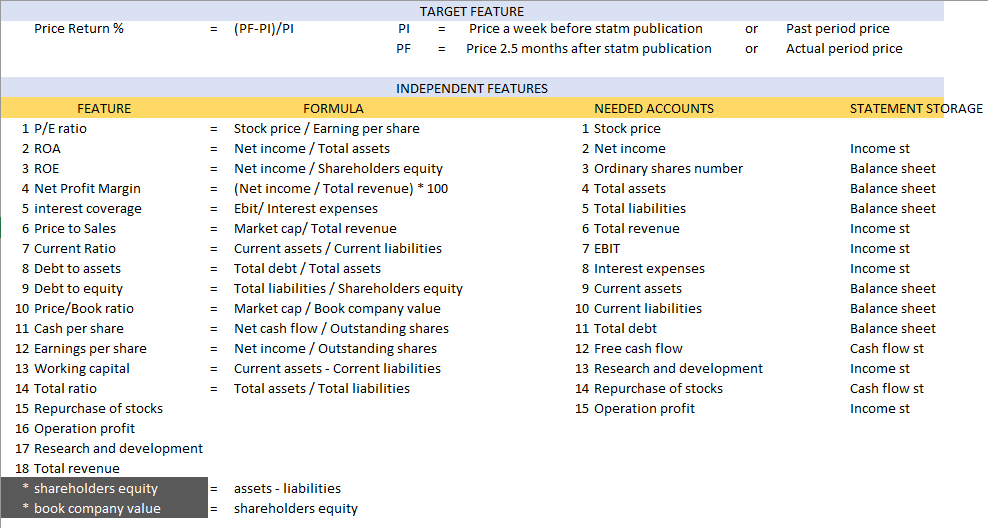

In [13]:
First_df['Shareholders Equity'] = First_df['totalAssets'] - First_df['totalLiab'] 
First_df['Market Cap'] = First_df['Initial Prices'] * First_df['Ordinary Shares Number']

First_df['Earnings per Share'] = First_df['netIncome'] / First_df['Ordinary Shares Number']
First_df['ROA'] = First_df['netIncome'] / First_df['totalAssets']
First_df['ROE'] = First_df['netIncome'] / First_df['Shareholders Equity']
First_df['Net Profit Margin'] = First_df['netIncome'] / First_df['totalRevenue']
First_df['Interest Coverage'] = First_df['ebit'] / First_df['interestExpense']
First_df['Price to Sales'] = First_df['Market Cap'] / First_df['totalRevenue']
First_df['Current Ratio'] = First_df['totalCurrentAssets'] / First_df['totalCurrentLiabilities']
First_df['Debt to Assets'] = First_df['Total Debt'] / First_df['totalAssets']
First_df['Debt to Equity'] = First_df['Total Debt'] / First_df['Shareholders Equity']
First_df['Price Book Ratio'] = First_df['Market Cap'] / First_df['Shareholders Equity']
First_df['Cash per Share'] = First_df['Free Cash Flow'] / First_df['Ordinary Shares Number']
First_df['Working Capital '] = First_df['totalCurrentAssets'] - First_df['totalCurrentLiabilities']
First_df['Total Ratio'] = First_df['totalAssets'] / First_df['totalLiab']
First_df['PE Ratio'] = First_df['Initial Prices'] / First_df['Earnings per Share']

In [14]:
First_df

,stock,endDate,netIncome,totalRevenue,ebit,researchDevelopment,operatingIncome,interestExpense,totalAssets,totalLiab,totalCurrentLiabilities,totalCurrentAssets,repurchaseOfStock,Initial Prices,Final Prices,Ordinary Shares Number,Total Debt,Free Cash Flow,Target,Shareholders Equity,Market Cap,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,MSFT,2020-06-30,4.428100e+10,1.430150e+11,5.295900e+10,1.926900e+10,5.295900e+10,-2.591000e+09,3.013110e+11,1.830070e+11,7.231000e+10,1.819150e+11,-2.296800e+10,194.240005,208.779999,7571000.0,70998000.0,45234000.0,0.074856,1.183040e+11,1.470591e+09,5848.765024,0.146961,0.374298,0.309625,-20.439599,0.010283,2.515765,0.000236,0.000600,0.012431,5.974640,1.096050e+11,1.646445,0.033210
1,MSFT,2019-06-30,3.924000e+10,1.258430e+11,4.295900e+10,1.687600e+10,4.295900e+10,-2.686000e+09,2.865560e+11,1.842260e+11,6.942000e+10,1.755520e+11,-1.954300e+10,132.850006,136.330002,7643000.0,78366000.0,38260000.0,0.026195,1.023300e+11,1.015373e+09,5134.109643,0.136937,0.383465,0.311817,-15.993671,0.008069,2.528839,0.000273,0.000766,0.009923,5.005888,1.061320e+11,1.555459,0.025876
2,MSFT,2018-06-30,1.657100e+10,1.103600e+11,3.505800e+10,1.472600e+10,3.505800e+10,-2.733000e+09,2.588480e+11,1.761300e+11,5.848800e+10,1.696620e+11,-1.072100e+10,100.860001,112.139999,7677000.0,81808000.0,32252000.0,0.111838,8.271800e+10,7.743022e+08,2158.525466,0.064018,0.200331,0.150154,-12.827662,0.007016,2.900800,0.000316,0.000989,0.009361,4.201120,1.111740e+11,1.469642,0.046726
3,MSFT,2017-06-30,2.548900e+10,9.657100e+10,2.933100e+10,1.303700e+10,2.933100e+10,-2.222000e+09,2.503120e+11,1.626010e+11,5.574500e+10,1.626960e+11,-1.178800e+10,70.870003,75.309998,7708000.0,86194000.0,31378000.0,0.062650,8.771100e+10,5.462660e+08,3306.824079,0.101829,0.290602,0.263941,-13.200270,0.005657,2.918576,0.000344,0.000983,0.006228,4.070835,1.069510e+11,1.539425,0.021431
4,T,2020-12-31,-5.176000e+09,1.717600e+11,2.565600e+10,NaN,2.565600e+10,-7.925000e+09,5.257610e+11,3.465210e+11,6.343800e+10,5.200800e+10,-5.498000e+09,29.400000,30.010000,7125922.0,179447000.0,27455000.0,0.020748,1.792400e+11,2.095021e+08,-726.362147,-0.009845,-0.028877,-0.030135,-3.237350,0.001220,0.819824,0.000341,0.001001,0.001169,3.852835,-1.143000e+10,1.517256,-0.040476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,TV,2017-12-31,4.524496e+09,9.427424e+10,1.573163e+10,NaN,1.573163e+10,-9.151191e+09,2.972201e+11,1.975632e+11,5.076482e+10,8.704470e+10,-5.185726e+09,19.190001,15.380000,342337100.0,133403832.0,6562580.0,-0.198541,9.965691e+10,6.569449e+09,13.216493,0.015223,0.045401,0.047993,-1.719080,0.069684,1.714666,0.000449,0.001339,0.065921,0.019170,3.627989e+10,1.504431,1.451974
241,HERDEZ.MX,2020-12-31,8.279600e+08,2.403628e+10,2.878403e+09,NaN,2.878403e+09,-9.068970e+08,3.357465e+10,1.623819e+10,4.807349e+09,1.164078e+10,-1.132437e+09,40.029999,42.650002,341712.0,10293637.0,2121697.0,0.065451,1.733646e+10,1.367873e+07,2422.976073,0.024660,0.047758,0.034446,-3.173903,0.000569,2.421455,0.000307,0.000594,0.000789,6.209021,6.833431e+09,2.067635,0.016521
242,HERDEZ.MX,2019-12-31,1.014497e+09,2.242037e+10,2.898386e+09,NaN,2.898386e+09,-7.243140e+08,3.308143e+10,1.483378e+10,4.627921e+09,1.097466e+10,-9.007790e+08,38.490002,33.770000,380578.0,8859043.0,1670310.0,-0.122629,1.824766e+10,1.464845e+07,2665.674316,0.030667,0.055596,0.045249,-4.001560,0.000653,2.371401,0.000268,0.000485,0.000803,4.388877,6.346734e+09,2.230142,0.014439
243,HERDEZ.MX,2018-12-31,1.156258e+09,2.097068e+10,2.986002e+09,NaN,2.986002e+09,-5.982280e+08,2.964000e+10,1.139035e+10,3.703781e+09,9.804335e+09,-2.807470e+08,39.290001,43.020000,421611.0,6638259.0,1591127.0,0.094935,1.824965e+10,1.656510e+07,2742.475884,0.039010,0.063358,0.055137,-4.991411,0.000790,2.647115

In [15]:
First_df = First_df.drop(['Final Prices', 'Initial Prices'], axis= 1)

In [16]:
# Check columns index
First_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock                    245 non-null    object 
 1   endDate                  245 non-null    object 
 2   netIncome                245 non-null    float64
 3   totalRevenue             245 non-null    float64
 4   ebit                     245 non-null    float64
 5   researchDevelopment      129 non-null    float64
 6   operatingIncome          245 non-null    float64
 7   interestExpense          243 non-null    float64
 8   totalAssets              245 non-null    float64
 9   totalLiab                245 non-null    float64
 10  totalCurrentLiabilities  245 non-null    float64
 11  totalCurrentAssets       245 non-null    float64
 12  repurchaseOfStock        202 non-null    float64
 13  Ordinary Shares Number   245 non-null    float64
 14  Total Debt               2

In [17]:
Ratios_DF = First_df.iloc[:,[16,0,1,3,5,6,12,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]
Ratios_DF

,Target,stock,endDate,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,0.074856,MSFT,2020-06-30,1.430150e+11,1.926900e+10,5.295900e+10,-2.296800e+10,5848.765024,0.146961,0.374298,0.309625,-20.439599,0.010283,2.515765,0.000236,0.000600,0.012431,5.974640,1.096050e+11,1.646445,0.033210
1,0.026195,MSFT,2019-06-30,1.258430e+11,1.687600e+10,4.295900e+10,-1.954300e+10,5134.109643,0.136937,0.383465,0.311817,-15.993671,0.008069,2.528839,0.000273,0.000766,0.009923,5.005888,1.061320e+11,1.555459,0.025876
2,0.111838,MSFT,2018-06-30,1.103600e+11,1.472600e+10,3.505800e+10,-1.072100e+10,2158.525466,0.064018,0.200331,0.150154,-12.827662,0.007016,2.900800,0.000316,0.000989,0.009361,4.201120,1.111740e+11,1.469642,0.046726
3,0.062650,MSFT,2017-06-30,9.657100e+10,1.303700e+10,2.933100e+10,-1.178800e+10,3306.824079,0.101829,0.290602,0.263941,-13.200270,0.005657,2.918576,0.000344,0.000983,0.006228,4.070835,1.069510e+11,1.539425,0.021431
4,0.020748,T,2020-12-31,1.717600e+11,NaN,2.565600e+10,-5.498000e+09,-726.362147,-0.009845,-0.028877,-0.030135,-3.237350,0.001220,0.819824,0.000341,0.001001,0.001169,3.852835,-1.143000e+10,1.517256,-0.040476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-0.198541,TV,2017-12-31,9.427424e+10,NaN,1.573163e+10,-5.185726e+09,13.216493,0.015223,0.045401,0.047993,-1.719080,0.069684,1.714666,0.000449,0.001339,0.065921,0.019170,3.627989e+10,1.504431,1.451974
241,0.065451,HERDEZ.MX,2020-12-31,2.403628e+10,NaN,2.878403e+09,-1.132437e+09,2422.976073,0.024660,0.047758,0.034446,-3.173903,0.000569,2.421455,0.000307,0.000594,0.000789,6.209021,6.833431e+09,2.067635,0.016521
242,-0.122629,HERDEZ.MX,2019-12-31,2.242037e+10,NaN,2.898386e+09,-9.007790e+08,2665.674316,0.030667,0.055596,0.045249,-4.001560,0.000653,2.371401,0.000268,0.000485,0.000803,4.388877,6.346734e+09,2.230142,0.014439
243,0.094935,HERDEZ.MX,2018-12-31,2.097068e+10,NaN,2.986002e+09,-2.807470e+08,2742.475884,0.039010,0.063358,0.055137,-4.991411,0.000790,2.647115,0.000224,0.000364,0.000908,3.773922,6.100554e+09,2.602203,0.014326


In [18]:
Ratios_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Target               245 non-null    float64
 1   stock                245 non-null    object 
 2   endDate              245 non-null    object 
 3   totalRevenue         245 non-null    float64
 4   researchDevelopment  129 non-null    float64
 5   operatingIncome      245 non-null    float64
 6   repurchaseOfStock    202 non-null    float64
 7   Earnings per Share   245 non-null    float64
 8   ROA                  245 non-null    float64
 9   ROE                  245 non-null    float64
 10  Net Profit Margin    245 non-null    float64
 11  Interest Coverage    243 non-null    float64
 12  Price to Sales       245 non-null    float64
 13  Current Ratio        245 non-null    float64
 14  Debt to Assets       243 non-null    float64
 15  Debt to Equity       243 non-null    flo

In [19]:
len(Ratios_DF)

245

In [20]:
def Features_creator(col):
  Account_change = []
  row = 0
  while row < (len(Ratios_DF)-1):
    Account_change_row = (Ratios_DF.loc[row, col] - Ratios_DF.loc[row + 1, col]) / Ratios_DF.loc[row + 1, col]
    Account_change.append(Account_change_row)
    row = 1 + row
  Account_change.append(0)  
  return Account_change

In [21]:
Features_creator('totalRevenue')

[0.13645574247276368,
 0.1402953968829286,
 0.14278613662486667,
 -0.4377561714019562,
 -0.052060510063854565,
 0.06112230316943475,
 0.06359548042305632,
 -0.4151649272353059,
 0.055120803769784836,
 -0.020410775805267418,
 0.15861957650261305,
 22.479872989859675,
 0.45045312732134896,
 0.03953667953667954,
 0.23262897391966494,
 -0.971220696116191,
 0.12770532012826136,
 0.1830008989979462,
 0.23421586757475982,
 -0.7128584897840773,
 0.37623430604373276,
 0.2045412582067698,
 0.3093396152159491,
 2.607756434960751,
 -0.0501502774352651,
 0.05217920129738496,
 0.02760129153213207,
 0.4540800872357182,
 -0.11409864219395696,
 0.08647230320699709,
 -0.05280017673699326,
 -0.725895087427144,
 0.19854842367883874,
 0.018687097400256925,
 0.0723360818203441,
 2.739678304054555,
 -0.07389737429208855,
 -0.05565279398418255,
 0.06861556579266392,
 -0.6292267584470956,
 0.08201208921003265,
 0.01576614724480578,
 0.1288539060881758,
 2.267474671747936,
 -0.10094362584486342,
 0.005009902201

In [22]:
Ratios_DF

,Target,stock,endDate,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,0.074856,MSFT,2020-06-30,1.430150e+11,1.926900e+10,5.295900e+10,-2.296800e+10,5848.765024,0.146961,0.374298,0.309625,-20.439599,0.010283,2.515765,0.000236,0.000600,0.012431,5.974640,1.096050e+11,1.646445,0.033210
1,0.026195,MSFT,2019-06-30,1.258430e+11,1.687600e+10,4.295900e+10,-1.954300e+10,5134.109643,0.136937,0.383465,0.311817,-15.993671,0.008069,2.528839,0.000273,0.000766,0.009923,5.005888,1.061320e+11,1.555459,0.025876
2,0.111838,MSFT,2018-06-30,1.103600e+11,1.472600e+10,3.505800e+10,-1.072100e+10,2158.525466,0.064018,0.200331,0.150154,-12.827662,0.007016,2.900800,0.000316,0.000989,0.009361,4.201120,1.111740e+11,1.469642,0.046726
3,0.062650,MSFT,2017-06-30,9.657100e+10,1.303700e+10,2.933100e+10,-1.178800e+10,3306.824079,0.101829,0.290602,0.263941,-13.200270,0.005657,2.918576,0.000344,0.000983,0.006228,4.070835,1.069510e+11,1.539425,0.021431
4,0.020748,T,2020-12-31,1.717600e+11,NaN,2.565600e+10,-5.498000e+09,-726.362147,-0.009845,-0.028877,-0.030135,-3.237350,0.001220,0.819824,0.000341,0.001001,0.001169,3.852835,-1.143000e+10,1.517256,-0.040476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-0.198541,TV,2017-12-31,9.427424e+10,NaN,1.573163e+10,-5.185726e+09,13.216493,0.015223,0.045401,0.047993,-1.719080,0.069684,1.714666,0.000449,0.001339,0.065921,0.019170,3.627989e+10,1.504431,1.451974
241,0.065451,HERDEZ.MX,2020-12-31,2.403628e+10,NaN,2.878403e+09,-1.132437e+09,2422.976073,0.024660,0.047758,0.034446,-3.173903,0.000569,2.421455,0.000307,0.000594,0.000789,6.209021,6.833431e+09,2.067635,0.016521
242,-0.122629,HERDEZ.MX,2019-12-31,2.242037e+10,NaN,2.898386e+09,-9.007790e+08,2665.674316,0.030667,0.055596,0.045249,-4.001560,0.000653,2.371401,0.000268,0.000485,0.000803,4.388877,6.346734e+09,2.230142,0.014439
243,0.094935,HERDEZ.MX,2018-12-31,2.097068e+10,NaN,2.986002e+09,-2.807470e+08,2742.475884,0.039010,0.063358,0.055137,-4.991411,0.000790,2.647115,0.000224,0.000364,0.000908,3.773922,6.100554e+09,2.602203,0.014326


In [23]:
def mult_features_creator(cols):
  #print ('getting returns for row' + str(row) + 'from column' + str(col))
  return pd.concat([pd.Series(Features_creator(col)) for col in cols], axis=1)

In [24]:
# Avoid column format for consulted lists (In this case the features names )
%pprint

Pretty printing has been turned OFF


In [25]:
Features_cols = list(Ratios_DF.columns)
Features_cols

['Target', 'stock', 'endDate', 'totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']

In [26]:
cols = ['totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']
Features_DF = mult_features_creator(cols)
Features_DF.columns = ['totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']
Features_DF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,0.136456,0.141799,0.232780,0.175255,0.139198,0.073206,-0.023905,-0.007031,0.277980,0.274424,-0.005170,-0.138386,-0.216350,0.252766,0.193523,0.032723,0.058495,0.283447
1,0.140295,0.146000,0.225369,0.822871,1.378526,1.139024,0.914156,1.076648,0.246811,0.149999,-0.128227,-0.134699,-0.225665,0.060015,0.191560,-0.045352,0.058393,-0.446223
2,0.142786,0.129554,0.195254,-0.090516,-0.347251,-0.371315,-0.310634,-0.431107,-0.028227,0.240342,-0.006090,-0.082184,0.006405,0.503005,0.032004,0.039485,-0.045331,1.180271
3,-0.437756,NaN,0.143241,1.144052,-5.552583,-11.343445,-11.063276,-9.758583,3.077492,3.637576,2.560002,0.008899,-0.018429,4.328398,0.056582,-10.357043,0.014611,-1.529489
4,-0.052061,NaN,-0.075160,1.274721,-1.379014,-1.390639,-1.419431,-1.392740,-0.017160,-0.213611,0.031663,0.018051,0.093085,-0.160168,-0.043868,-0.192226,-0.038123,-3.002314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2.922164,NaN,4.465401,3.579262,-0.994545,-0.382703,-0.049365,0.393269,-0.458370,121.449601,-0.291886,0.463972,1.254512,82.548031,-0.996913,4.309176,-0.272391,86.886527
241,0.072073,NaN,-0.006895,0.257175,-0.091046,-0.195861,-0.140976,-0.238738,-0.206834,-0.128977,0.021108,0.144866,0.223006,-0.017119,0.414718,0.076685,-0.072868,0.144183
242,0.069129,NaN,-0.029342,2.208508,-0.028004,-0.213878,-0.122508,-0.179335,-0.198311,-0.172882,-0.104157,0.195712,0.334689,-0.115608,0.162949,0.040354,-0.142979,0.007863
243,0.045142,NaN,0.061539,0.809881,0.123480,0.038394,0.050308,0.057552,0.017644,-0.191245,0.001493,-0.017999,-0.006732,-0.196785,0.218180,0.188764,-0.018383,-0.235257


In [27]:
Features_DF.to_csv('Features_DF.csv', index= False)

In [28]:
date_stock_target_addDF = Ratios_DF[['endDate', 'stock', 'Target']]
Features_Df = pd.concat([date_stock_target_addDF, Features_DF], axis= 1)
Features_Df

,endDate,stock,Target,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,2020-06-30,MSFT,0.074856,0.136456,0.141799,0.232780,0.175255,0.139198,0.073206,-0.023905,-0.007031,0.277980,0.274424,-0.005170,-0.138386,-0.216350,0.252766,0.193523,0.032723,0.058495,0.283447
1,2019-06-30,MSFT,0.026195,0.140295,0.146000,0.225369,0.822871,1.378526,1.139024,0.914156,1.076648,0.246811,0.149999,-0.128227,-0.134699,-0.225665,0.060015,0.191560,-0.045352,0.058393,-0.446223
2,2018-06-30,MSFT,0.111838,0.142786,0.129554,0.195254,-0.090516,-0.347251,-0.371315,-0.310634,-0.431107,-0.028227,0.240342,-0.006090,-0.082184,0.006405,0.503005,0.032004,0.039485,-0.045331,1.180271
3,2017-06-30,MSFT,0.062650,-0.437756,NaN,0.143241,1.144052,-5.552583,-11.343445,-11.063276,-9.758583,3.077492,3.637576,2.560002,0.008899,-0.018429,4.328398,0.056582,-10.357043,0.014611,-1.529489
4,2020-12-31,T,0.020748,-0.052061,NaN,-0.075160,1.274721,-1.379014,-1.390639,-1.419431,-1.392740,-0.017160,-0.213611,0.031663,0.018051,0.093085,-0.160168,-0.043868,-0.192226,-0.038123,-3.002314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2017-12-31,TV,-0.198541,2.922164,NaN,4.465401,3.579262,-0.994545,-0.382703,-0.049365,0.393269,-0.458370,121.449601,-0.291886,0.463972,1.254512,82.548031,-0.996913,4.309176,-0.272391,86.886527
241,2020-12-31,HERDEZ.MX,0.065451,0.072073,NaN,-0.006895,0.257175,-0.091046,-0.195861,-0.140976,-0.238738,-0.206834,-0.128977,0.021108,0.144866,0.223006,-0.017119,0.414718,0.076685,-0.072868,0.144183
242,2019-12-31,HERDEZ.MX,-0.122629,0.069129,NaN,-0.029342,2.208508,-0.028004,-0.213878,-0.122508,-0.179335,-0.198311,-0.172882,-0.104157,0.195712,0.334689,-0.115608,0.162949,0.040354,-0.142979,0.007863
243,2018-12-31,HERDEZ.MX,0.094935,0.045142,NaN,0.061539,0.809881,0.123480,0.038394,0.050308,0.057552,0.017644,-0.191245,0.001493,-0.017999,-0.006732,-0.196785,0.218180,0.188764,-0.018383,-0.235257


In [29]:
Features_Df['fourth_period_indicator'] = Features_Df['stock'].shift(-1) == Features_Df['stock']
Features_Df

,endDate,stock,Target,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio,fourth_period_indicator
0,2020-06-30,MSFT,0.074856,0.136456,0.141799,0.232780,0.175255,0.139198,0.073206,-0.023905,-0.007031,0.277980,0.274424,-0.005170,-0.138386,-0.216350,0.252766,0.193523,0.032723,0.058495,0.283447,True
1,2019-06-30,MSFT,0.026195,0.140295,0.146000,0.225369,0.822871,1.378526,1.139024,0.914156,1.076648,0.246811,0.149999,-0.128227,-0.134699,-0.225665,0.060015,0.191560,-0.045352,0.058393,-0.446223,True
2,2018-06-30,MSFT,0.111838,0.142786,0.129554,0.195254,-0.090516,-0.347251,-0.371315,-0.310634,-0.431107,-0.028227,0.240342,-0.006090,-0.082184,0.006405,0.503005,0.032004,0.039485,-0.045331,1.180271,True
3,2017-06-30,MSFT,0.062650,-0.437756,NaN,0.143241,1.144052,-5.552583,-11.343445,-11.063276,-9.758583,3.077492,3.637576,2.560002,0.008899,-0.018429,4.328398,0.056582,-10.357043,0.014611,-1.529489,False
4,2020-12-31,T,0.020748,-0.052061,NaN,-0.075160,1.274721,-1.379014,-1.390639,-1.419431,-1.392740,-0.017160,-0.213611,0.031663,0.018051,0.093085,-0.160168,-0.043868,-0.192226,-0.038123,-3.002314,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2017-12-31,TV,-0.198541,2.922164,NaN,4.465401,3.579262,-0.994545,-0.382703,-0.049365,0.393269,-0.458370,121.449601,-0.291886,0.463972,1.254512,82.548031,-0.996913,4.309176,-0.272391,86.886527,False
241,2020-12-31,HERDEZ.MX,0.065451,0.072073,NaN,-0.006895,0.257175,-0.091046,-0.195861,-0.140976,-0.238738,-0.206834,-0.128977,0.021108,0.144866,0.223006,-0.017119,0.414718,0.076685,-0.072868,0.144183,True
242,2019-12-31,HERDEZ.MX,-0.122629,0.069129,NaN,-0.029342,2.208508,-0.028004,-0.213878,-0.122508,-0.179335,-0.198311,-0.172882,-0.104157,0.195712,0.334689,-0.115608,0.162949,0.040354,-0.142979,0.007863,True
243,2018-12-31,HERDEZ.MX,0.094935,0.045142,NaN,0.061539,0.809881,0.123480,0.038394,0.050308,0.057552,0.017644,-0.191245,0.001493,-0.017999,-0.006732,-0.196785,0.218180,0.188764,-0.018383,-0.235257,True


In [30]:
Features_Df = Features_Df[Features_Df.fourth_period_indicator != False]
Features_Df

,endDate,stock,Target,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio,fourth_period_indicator
0,2020-06-30,MSFT,0.074856,0.136456,0.141799,0.232780,0.175255,0.139198,0.073206,-0.023905,-0.007031,0.277980,0.274424,-0.005170,-0.138386,-0.216350,0.252766,0.193523,0.032723,0.058495,0.283447,True
1,2019-06-30,MSFT,0.026195,0.140295,0.146000,0.225369,0.822871,1.378526,1.139024,0.914156,1.076648,0.246811,0.149999,-0.128227,-0.134699,-0.225665,0.060015,0.191560,-0.045352,0.058393,-0.446223,True
2,2018-06-30,MSFT,0.111838,0.142786,0.129554,0.195254,-0.090516,-0.347251,-0.371315,-0.310634,-0.431107,-0.028227,0.240342,-0.006090,-0.082184,0.006405,0.503005,0.032004,0.039485,-0.045331,1.180271,True
4,2020-12-31,T,0.020748,-0.052061,NaN,-0.075160,1.274721,-1.379014,-1.390639,-1.419431,-1.392740,-0.017160,-0.213611,0.031663,0.018051,0.093085,-0.160168,-0.043868,-0.192226,-0.038123,-3.002314,True
5,2019-12-31,T,-0.129066,0.061122,NaN,-0.122620,2.968801,-0.279562,-0.308008,-0.310854,-0.323585,-0.171062,0.222614,-0.004566,0.010233,0.006079,0.245625,0.284455,0.089048,0.002374,0.807490,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2019-12-31,TV,-0.459530,0.002072,NaN,-0.006540,-0.698454,-0.211682,-0.195734,-0.222352,-0.215834,-0.067542,-0.120133,0.077160,0.043683,0.009140,-0.127446,-0.183727,0.074173,0.018925,0.122043,True
239,2018-12-31,TV,-0.142417,0.074337,NaN,0.150304,-0.113819,0.343930,0.328417,0.266268,0.236293,0.084403,-0.377300,-0.134138,-0.017955,-0.063899,-0.362202,0.147216,-0.351668,0.025386,-0.496317,True
241,2020-12-31,HERDEZ.MX,0.065451,0.072073,NaN,-0.006895,0.257175,-0.091046,-0.195861,-0.140976,-0.238738,-0.206834,-0.128977,0.021108,0.144866,0.223006,-0.017119,0.414718,0.076685,-0.072868,0.144183,True
242,2019-12-31,HERDEZ.MX,-0.122629,0.069129,NaN,-0.029342,2.208508,-0.028004,-0.213878,-0.122508,-0.179335,-0.198311,-0.172882,-0.104157,0.195712,0.334689,-0.115608,0.162949,0.040354,-0.142979,0.007863,True


In [31]:
Features_Df.isna().sum()

endDate                     0
stock                       0
Target                      0
totalRevenue                0
researchDevelopment        86
operatingIncome             0
repurchaseOfStock          35
Earnings per Share          0
ROA                         0
ROE                         0
Net Profit Margin           0
Interest Coverage           2
Price to Sales              0
Current Ratio               0
Debt to Assets              5
Debt to Equity              5
Price Book Ratio            0
Cash per Share              0
Working Capital             0
Total Ratio                 0
PE Ratio                    0
fourth_period_indicator     0
dtype: int64

In [32]:
Features_Df.mean(axis= 0)

Target                       0.014045
totalRevenue                 0.063952
researchDevelopment          0.117197
operatingIncome              0.018785
repurchaseOfStock            5.486560
Earnings per Share          -1.088816
ROA                         -0.707719
ROE                        394.023631
Net Profit Margin           -1.508615
Interest Coverage            0.025485
Price to Sales               0.052072
Current Ratio                0.024980
Debt to Assets               0.226947
Debt to Equity               3.165078
Price Book Ratio             1.940317
Cash per Share               1.247741
Working Capital             -0.946019
Total Ratio                 -0.021980
PE Ratio                     1.270350
fourth_period_indicator      1.000000
dtype: float64

In [33]:
Features_Df.max(axis= 0)

endDate                    2021-01-31
stock                             XOM
Target                       0.802721
totalRevenue                 0.856255
researchDevelopment          0.704108
operatingIncome               10.7017
repurchaseOfStock             504.944
Earnings per Share            133.115
ROA                           257.361
ROE                           71946.1
Net Profit Margin             122.675
Interest Coverage             8.28657
Price to Sales                1.59554
Current Ratio                 4.46696
Debt to Assets                14.4726
Debt to Equity                556.045
Price Book Ratio              384.542
Cash per Share                155.843
Working Capital               10.4939
Total Ratio                  0.925456
PE Ratio                      108.132
fourth_period_indicator          True
dtype: object

In [34]:
# Function to confirm if outliers were removed


#(['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'])
def find_anomalies(col):
    #define a list to accumlate anomalies
        #lists_df = []
        anomalies = [] 
        # Set upper and lower limit to 3 standard deviation
        #for col in col_data:
        col_data = Features_Df[col]

        random_data_std = np.std(col_data)
        random_data_mean = np.mean(col_data)
        anomaly_cut_off = random_data_std * 3
        
        lower_limit  = random_data_mean - anomaly_cut_off 
        upper_limit = random_data_mean + anomaly_cut_off

        # Generate outliers
        anomalies.append(lower_limit) 
        for outlier in col_data:
            if outlier > upper_limit or outlier < lower_limit:
                anomalies.append(outlier)      
                dfObj = pd.DataFrame(anomalies, columns=[col])

        return dfObj

In [35]:
test1 = find_anomalies('Price Book Ratio')
test1

,Price Book Ratio
0,-85.897435
1,384.542466


In [36]:
def outlier_all_cols(columns):
  # print ('getting returns for row' + str(row) + 'from column' + str(col))
  # return pd.append([pd.Series(find_anomalies(col)) for col in columns], axis=0)
  #columns = ['totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']
  frames = []
  for col in columns:
    #anomalies_DF.append(find_anomalies(col))
    #anomalies_DF
    testtt = find_anomalies(col)

    csv_file = "file{0}.csv".format(col)
    testtt.to_csv(csv_file, index= False)

    #read previously saved csv files into 10 seperate df
    # and add to list
    
    #for x in range(1,18):
    csv_file = "file{0}.csv".format(col)
    newdf = pd.read_csv(csv_file)
    frames.append(newdf)

  result = pd.concat(frames, axis=1)
  return result

#outlier_all_cols(columns)
      #for column in df.columns[1:]:

  # return pd.concat([pd.Series(Features_creator(col)) for col in cols], axis=1)

In [37]:
columns = ['totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']
outlier_all_cols(columns)

,totalRevenue,researchDevelopment,operatingIncome,repurchaseOfStock,Earnings per Share,ROA,ROE,Net Profit Margin,Interest Coverage,Price to Sales,Current Ratio,Debt to Assets,Debt to Equity,Price Book Ratio,Cash per Share,Working Capital,Total Ratio,PE Ratio
0,-0.512651,-0.418663,-4.761702,-123.143659,-92.168442,-109.434022,-15561.692451,-95.826366,-3.942626,-0.927640,-1.300711,-3.302152,-123.569725,-85.897435,-35.275772,-31.274078,-0.460612,-32.473000
1,-0.710013,0.704108,10.701729,504.944444,113.693677,116.518996,71946.116129,99.406332,8.286570,1.518738,4.466957,14.472615,556.044834,384.542466,155.843412,-55.270270,0.522886,108.131616
2,-0.621198,NaN,-15.634163,NaN,-360.664084,-390.678349,NaN,-385.559406,-4.757101,1.595542,NaN,NaN,NaN,NaN,43.280545,-122.986425,0.925456,84.821292
3,0.856255,NaN,NaN,NaN,133.115231,257.360640,NaN,122.674984,-7.820833,1.259199,NaN,NaN,NaN,NaN,NaN,NaN,-0.464204,36.548250
4,-0.565567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.653894,1.118436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Space to detect NaN's generated from just one missing value (aprox 6 examples in repurchase of stocks)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


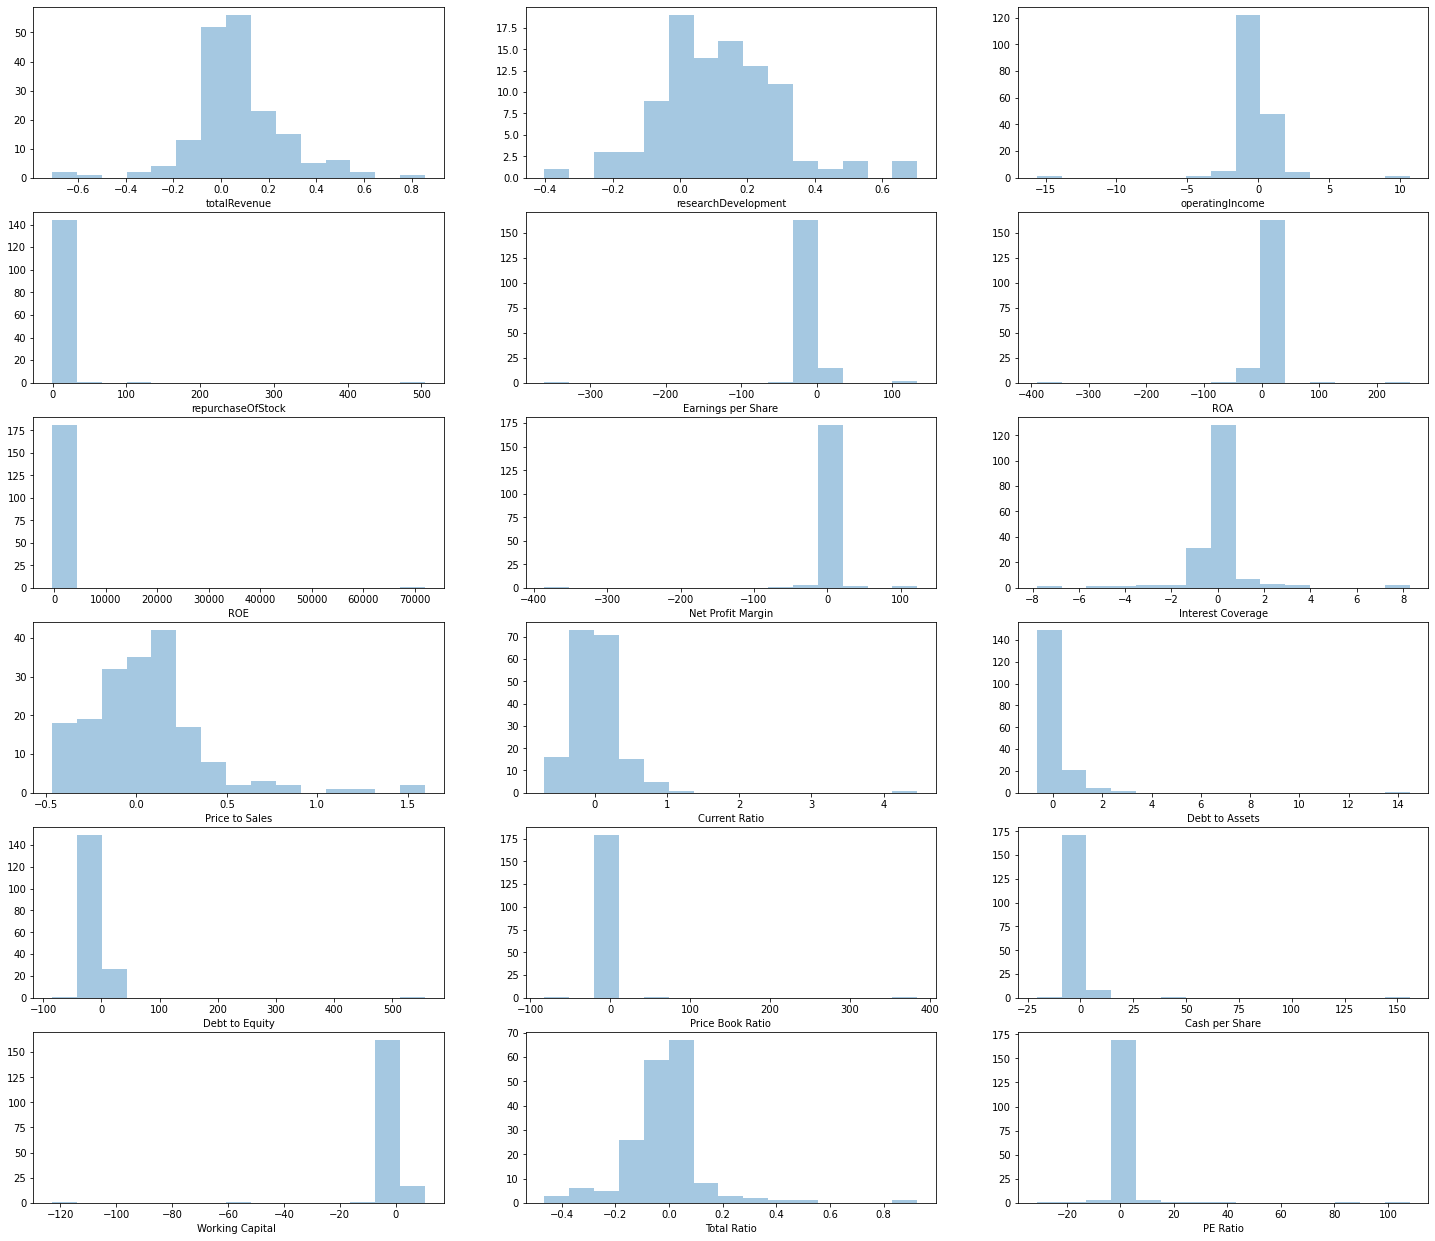

In [40]:
# plot a histogram for each of the features above 
Df_onlyfeatures = Features_Df[['totalRevenue', 'researchDevelopment', 'operatingIncome', 'repurchaseOfStock', 'Earnings per Share', 'ROA', 'ROE', 'Net Profit Margin', 'Interest Coverage', 'Price to Sales', 'Current Ratio', 'Debt to Assets', 'Debt to Equity', 'Price Book Ratio', 'Cash per Share', 'Working Capital ', 'Total Ratio', 'PE Ratio']]

rows = 6
ncols = 3

fig, ax = plt.subplots(nrows=rows, ncols=ncols, figsize=(25, 22))

r = 0
c = 0

for i in Df_onlyfeatures:
  sns.distplot(Df_onlyfeatures[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

NEURAL NETWORK BUILDING

In [41]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np